<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Logistic Regression

What were some benefits of using linear regression?

- intuitive algorithm

- interpretability

Could we use it for **classification**?

Idea: for a binary problem, why not use linear regression to model the **probability** that a data point is in one class?

- by definition we would also model the probability of it being in the other class too

What decision would we need to make for this to work for prediction?

- a cutoff point i.e. a probability above which we say class 1 vs. 0

Linear regression itself does not return probabilities.

But with a simple transformation we can 'squash' our line to be between 0 and 1:

$$ \text{p} = \frac{1}{1 + e^{-z}} $$

Where $z$ is our linear model:

$$ z = \beta_0 + \beta_1x_1 + \beta_2x_2 ... $$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

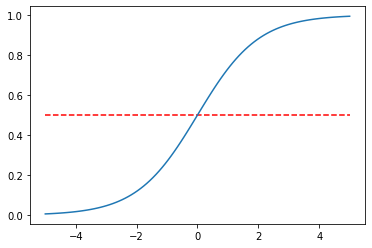

In [2]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x, [sigmoid(x) for x in x])
ax.hlines(0.5, -5, 5, colors="r", linestyles="--")

plt.show()

So what is our linear equation modelling now?

**Linear regression**: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$


**Logistic regression**: Log odds of a categorical response being "true" is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

This is the "log odds"

### Odds

When we say the "odds" of something, what do we mean?

The odds are the probability of something happening divided by the probability of it **not** happening

#### Odds

$$ \text{odds} = \frac{p}{1-p} $$

$$ p = \frac{\text{odds}}{1+\text{odds}} $$


The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1




# <font style = 'color:blue'>Logistic Regression in Python</font>
---

Let's look at a simple example of logistic regression, again using our Iris dataset.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target
df_iris["target"] = df_iris["target"].map({idx:name for idx, name in enumerate(iris.target_names)})
df_iris = df_iris[df_iris["target"] != "versicolor"]

In [4]:
X = df_iris[["petal length (cm)"]]
y = df_iris["target"]

y.value_counts()

setosa       50
virginica    50
Name: target, dtype: int64

#### Convert targets to binary

In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit_transform(y)[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [10]:
# .ravel() "flattens" the output, because LabelBinarizer gives us arrays
y = lb.fit_transform(y).ravel()
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=424242,
                                                    stratify=y)
lr.fit(X_train, y_train)

print(lr.intercept_, lr.coef_)

[-7.36053245] [[2.15546014]]


### Interpretation

- coefficients are on the **log odds** scale

- so an increase in 1 unit of petal length increases the log odds of being `versicolor` by 1.215

#### While log odds values are linear...

In [12]:
log_odds_petal_2_cm = lr.intercept_ + 2*lr.coef_[0][0]
log_odds_petal_3_cm = lr.intercept_ + 3*lr.coef_[0][0]
log_odds_petal_4_cm = lr.intercept_ + 4*lr.coef_[0][0]
log_odds_petal_5_cm = lr.intercept_ + 5*lr.coef_[0][0]

print(log_odds_petal_2_cm, log_odds_petal_3_cm, log_odds_petal_4_cm, log_odds_petal_5_cm)

[-3.04961217] [-0.89415203] [1.26130812] [3.41676826]


#### Probabilities are not!

In [13]:
def odds_to_p(odds):
    return odds / (1 + odds)


In [14]:
print(odds_to_p(np.exp(log_odds_petal_2_cm)),
      odds_to_p(np.exp(log_odds_petal_3_cm)),
      odds_to_p(np.exp(log_odds_petal_4_cm)),
      odds_to_p(np.exp(log_odds_petal_5_cm)))

[0.04523422] [0.29025374] [0.77925121] [0.96822449]


#### What to remember

- coefficients change the **log odds**

- you can convert log odds to probabilities, but the odds-to-probability scale is **not linear**
    - a 1 unit increase in log odds doesn't always give the same increase in probability

- positive coefficients increase log odds and therefore increase probability

- negative coefficients decrease log odds and therefore decrease probability

# <font style = 'color:blue'>Multinomial logistic regression</font>
---

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems: this is the basis for support vector machines.


- Multinomial logistic regression, on the other hand, can solve this as a single problem.

Multinomial logistic regression is known by a variety of other names, including polytomous LR, multiclass LR, softmax regression, multinomial logit, the maximum entropy (MaxEnt) classifier, and the conditional maximum entropy model.

Let's look at the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. 

In [16]:
glass_data = pd.read_csv('assets/data/glass.csv')
glass_data_headers = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


We will use this dataset to build a multinomial logistic regression model to predict the glass type.

First, let's do a train/test split:

In [18]:
train_x, test_x, train_y, test_y = train_test_split(glass_data[glass_data_headers[:-1]],
                                                    glass_data[glass_data_headers[-1]], 
                                                    test_size=0.3)
  

Now, let's build a multinomial logistic regression model.

In [19]:
# Train multinomial logistic regression model
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)
 

And how well does it perform?

In [20]:
from sklearn.metrics import accuracy_score

print("Multinomial Logistic regression Train Accuracy :: ", accuracy_score(train_y, mul_lr.predict(train_x)))
print("Multinomial Logistic regression Test Accuracy :: ", accuracy_score(test_y, mul_lr.predict(test_x)))
 

Multinomial Logistic regression Train Accuracy ::  0.6577181208053692
Multinomial Logistic regression Test Accuracy ::  0.6


### Imbalanced Classes

What can you do when there is a class imbalance?

Balance the training set by either:
    - Oversampling the minority class  
    - Undersampling the majority class   
    

- tell your algorithm to weight the classes differently

```python
LogisticRegression(class_weight="balanced")
LogisticRegression(class_weight={0: 100, 1: 200})
```

Recommended reading: [https://www.svds.com/learning-imbalanced-classes](https://www.svds.com/learning-imbalanced-classes/)

<a id="performance"> </a>


# <font style = 'color:blue'>Measuring Performance</font>
---

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:

  
  




- Imbalanced problems problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.


  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.


**Recap**: what are the two types of error we can make in an experiment?

**Type I**: false positive (doctor telling a man he's pregnant)

**Type II**: false negative (doctor telling a heavily pregnant lady that she's not pregnant)

Assessing classification performance is a trade-off between these two.

#### Terminology

**Sensitivity**: "true positive rate"

$$ \text{Sensitivity} = \frac{\sum{\text{True Positives}}}{\sum{\text{Actual Positives}}} $$

Perfect sensitivity = "all positive cases were found"

**Specificity**: "true negative rate"

$$ \text{Specificity} = \frac{\sum{\text{True Negatives}}}{\sum{\text{Actual Negatives}}} $$

Perfect specificity: "all negative cases were found"

#### Border control

How could we achieve "perfect sensitivity" (i.e. 100% true positive rate)?

- "everyone is a terrorist"

- 100% sensitivity (guaranteed to catch all terrorists)

- 0% specificity! Impossible to get any true negatives!

What about "perfect specificity"?

- "no one is a terrorist"

- 100% specificity (all non-terrorists are let in)

- 0% sensitivity (no terrorists caught)

A good classifier trades off these two, and a good measure of classification performance measures this

**Some of the most useful metrics for addressing these problems are:**
    
- **Classification accuracy/error**
  - Classification accuracy is the percentage of correct predictions (higher is better).
  - Classification error is the percentage of incorrect predictions (lower is better).
  - Easiest classification metric to understand.
  

- **Confusion matrix**
  - Gives you a better understanding of how your classifier is performing.
  - Allows you to calculate sensitivity, specificity, and many other metrics that might match your business objective better than accuracy.
  - Precision and recall are good for balancing misclassification costs.




### Trading True Positives and True Negatives

By default, and with respect to the underlying assumptions of logistic regression, we predict a positive class when the probability of the class is greater than .5 and predict a negative class otherwise.

What if we decide to use .3 as a threshold for picking the positive class? Is that even allowed?



This turns out to be a useful strategy. By setting a lower probability threshold we will predict more positive classes. Which means we will predict more true positives, but fewer true negatives.

Making this trade-off is important in applications that have imbalanced penalties for misclassification.

We can visually explore this trade off using ROC curves.

### ROC Curve & AUC

The ROC curve is created by plotting the true positive rate against the false positive rate at various model threshold settings.

Area Under the Curve (AUC) summarizes the impact of TPR and FPR in one single value.





  - Good for ranking and prioritisation problems.
  
  
  - Allows you to visualize the performance of your classifier across all possible classification thresholds, thus helping you to choose a threshold that appropriately balances sensitivity and specificity.
  
  
  - Still useful when there is high class imbalance (unlike classification accuracy/error).
  
  
  - Harder to use when there are more than two response classes.



There can be a variety of points on an ROC curve.

<img src="assets/images/roc_1.png" style="width:60%" />

We can begin by plotting an individual TPR/FPR pair for one threshold.

<img src="assets/images/roc_2.png" style="width:60%" />

We can continue adding pairs for different thresholds

<img src="assets/images/roc_3.png" style="width:60%" />

We can continue adding pairs for different thresholds

<img src="assets/images/roc_4.png" style="width:60%" />

Finally, we create a full curve that is described by TPR and FPR.
<img src="assets/images/roc_5.png" style="width:60%" />

With this curve, we can find the Area Under the Curve (AUC).

<img src="assets/images/roc_6.png" style="width:60%" />

# <font style = 'color:blue'>Advanced Metrics</font>
---

#### Precision

"Of the things we predicted as positive, how many were **actually** positive?"

$$ \text{Precision} = \frac{\sum{\text{True Positives}}}{\sum{\text{All Predicted Positives}}}  = \frac{\sum{\text{True Positives}}}{\sum{\text{True Positives}} + \sum{\text{False Positives}}} $$

#### Recall

"Of all possible positive cases, how many did we predict as positive?"

$$ \text{Recall} = \frac{\sum{\text{True Positives}}}{\sum{\text{All Positives}}}  = \frac{\sum{\text{True Positives}}}{\sum{\text{True Positives}} + \sum{\text{False Negatives}}} $$

![](assets/images/precision-recall.png)

from: [https://www.quora.com/What-is-the-best-way-to-understand-the-terms-precision-and-recall](https://www.quora.com/What-is-the-best-way-to-understand-the-terms-precision-and-recall)

We can even combine precision & recall into a single metric

$$ \text{F1 score} = 2\frac{\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}} $$

Retrain logistic regression for two harder iris classes

In [21]:
df_iris_2 = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris_2["target"] = iris.target
df_iris_2["target"] = df_iris_2["target"].map({idx:name for idx, name in enumerate(iris.target_names)})
df_iris_2 = df_iris_2[df_iris_2["target"] != "setosa"]

In [22]:
df_iris_2["target"].value_counts()

versicolor    50
virginica     50
Name: target, dtype: int64

In [23]:
lb2 = LabelBinarizer()

X_2 = df_iris_2[["petal length (cm)"]]
y_2 = lb2.fit_transform(df_iris_2["target"]).ravel()

lr_2 = LogisticRegression()

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,
                                                            y_2,
                                                            test_size=0.25,
                                                            random_state=424242,
                                                            stratify=y_2)
lr_2.fit(X_train_2, y_train_2);

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_2 = lr_2.predict(X_test_2)

acc = accuracy_score(y_test_2, y_pred_2)
prec = precision_score(y_test_2, y_pred_2)
rec = recall_score(y_test_2, y_pred_2)
f1 = f1_score(y_test_2, y_pred_2)

In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_2, y_pred_2))

print(f"Accuracy: {acc}\tPrecision: {prec}\tRecall: {rec}\tF-1: {f1}")

[[12  0]
 [ 1 12]]
Accuracy: 0.96	Precision: 1.0	Recall: 0.9230769230769231	F-1: 0.9600000000000001


![](assets/images/roc_curve.png)

from [https://www.ncss.com/software/ncss/roc-curves-ncss](https://www.ncss.com/software/ncss/roc-curves-ncss)

In [21]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test_2, y_pred_2)
print(f"AUC: {auc}")

AUC: 0.9615384615384616



# <font style = 'color:blue'> Lesson Review</font>
---



- **Logistic regression**
  - What kind of machine learning problems does logistic regression address?
  - What do the coefficients in a logistic regression represent? How does the interpretation differ from ordinary least squares? How is it similar?
  
- **The confusion matrix**
  - How do true positive rate and false positive rate help explain accuracy?
  - Why might one classification metric be more important to tune than another? Give an example of a business problem or project where this would be the case.

### <font style = 'color:black'> Additional Resources</font>

+ [Great overview of Logistic Regression in six short(ish) videos](https://www.youtube.com/watch?v=zAULhNrnuL4)
+ [ROC and AUC curve](https://www.dataschool.io/roc-curves-and-auc-explained/)
+ [More on ROC and AUC curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
+ [More on the confusion matrix - the metrics used here are Precision and Recall](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)
+ [Confusion matrix metrics (there are many)](https://en.wikipedia.org/wiki/Confusion_matrix)
